In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [70]:
data = pd.read_csv(r"G:\DataSets\Advertising.csv")
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [71]:
data = data.iloc[:,1:]     # Removing the first column
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [72]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Handle Missing Values

Axes(0.125,0.11;0.775x0.77)


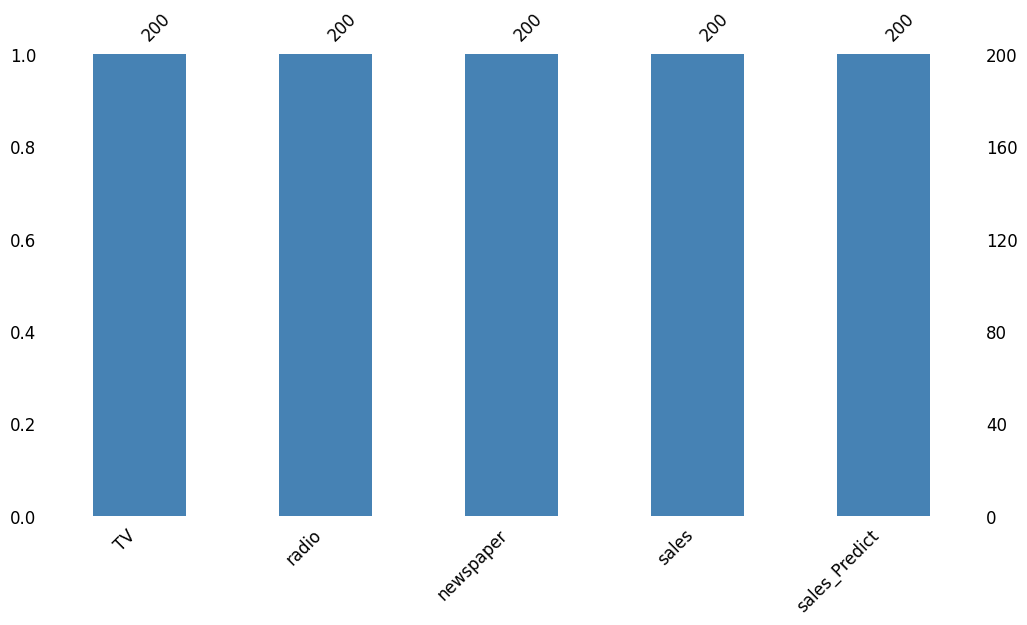

In [95]:
import missingno as msno

missing_bar  = msno.bar(data, figsize=(12, 6), fontsize=12, color='steelblue')

print(missing_bar)

In [96]:
miss_count = data.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


Normality Test

Q-Q

In [73]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

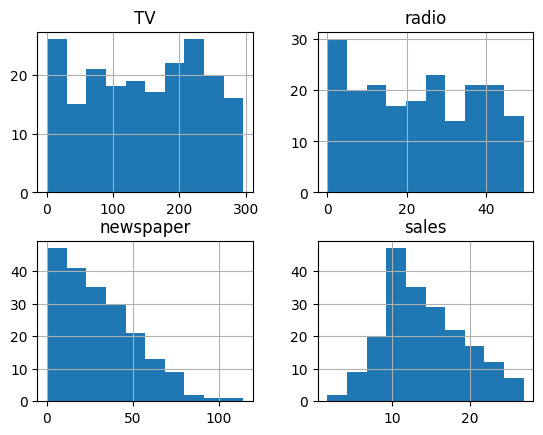

In [74]:
data.hist()
plt.show()

In [75]:
X_ID=data.iloc[:,0:3]
Y_DV=data["sales"]

In [76]:
X_ID

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [77]:
Y_DV

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [78]:
trainer=LinearRegression()

In [79]:
learner=trainer.fit(X_ID,Y_DV)

In [80]:
learner.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [81]:
learner.intercept_

2.938889369459412

In [49]:
Ytar=Y_DV.values

In [50]:
Ytar.ndim

1

In [82]:
sales_Predict=learner.predict(X_ID)

In [83]:
data["sales_Predict"]=sales_Predict

In [84]:
data

,TV,radio,newspaper,sales,sales_Predict
0,230.1,37.8,69.2,22.1,20.523974
1,44.5,39.3,45.1,10.4,12.337855
2,17.2,45.9,69.3,9.3,12.307671
3,151.5,41.3,58.5,18.5,17.597830
4,180.8,10.8,58.4,12.9,13.188672
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342
196,94.2,4.9,8.1,9.7,8.165312
197,177.0,9.3,6.4,12.8,12.785921
198,283.6,42.0,66.2,25.5,23.767321


Error Checking

In [85]:
from sklearn.metrics import mean_squared_error

In [91]:
Error=mean_squared_error(sales_Predict,Y_DV)

In [92]:
Error

2.784126314510936

Scatter graph plotting for TV and predicted sales

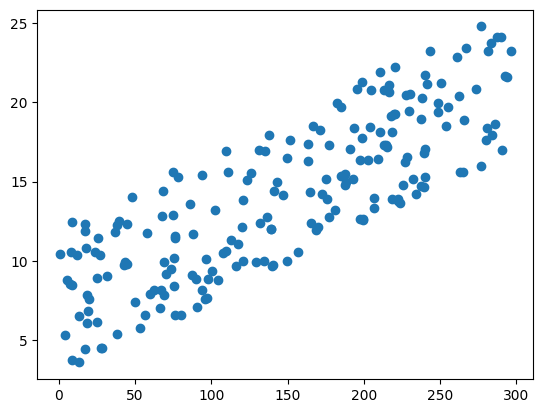

In [88]:
plt.scatter(data["TV"],data["sales_Predict"])
plt.show()

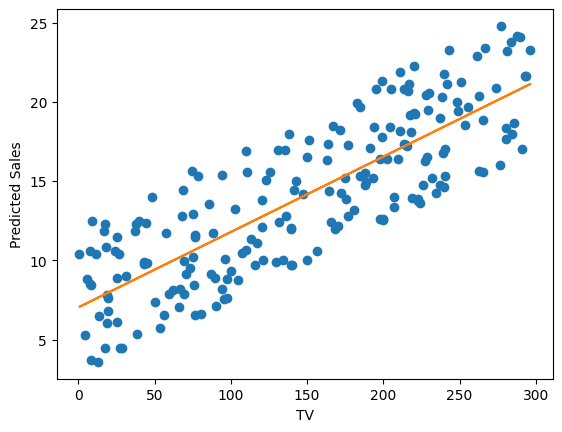

In [89]:
from scipy import stats
slope,intercept,r_value,p_value,std_err=stats.linregress(data["TV"],data["sales_Predict"])
line=slope*data["TV"]+intercept
plt.plot(data["TV"],data["sales_Predict"],'o',data["TV"],line)
plt.xlabel("TV")
plt.ylabel("Predicted Sales")
plt.show()